In [17]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [1]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [5]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
measurement=Base.classes.measurement
station=Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
session.query(func.max(measurement.date)).all()[0]

('2017-08-23',)

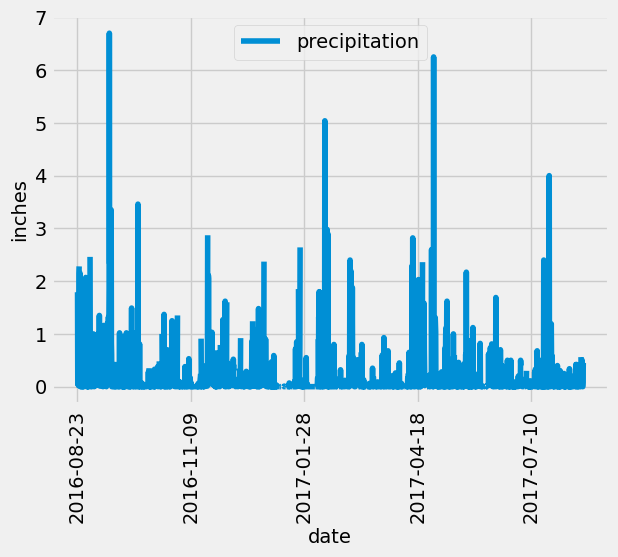

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago=dt.date(2017,8,23)-dt.timedelta(days=365)
one_year_ago

# Perform a query to retrieve the data and precipitation scores
prcpresults=session.query(measurement.date,measurement.prcp).filter(measurement.date>=one_year_ago).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df=pd.DataFrame(prcpresults,columns=["date","precipitation"])


# Sort the dataframe by date
prcp_df=prcp_df.sort_values("date")


# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(x="date",y="precipitation",rot=90)
plt.ylabel("inches")
plt.show()
                     




In [20]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [22]:
# Design a query to calculate the total number of stations in the dataset
stations = session.query(station).group_by(station.station).count()
print(stations)

9


In [24]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stations = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(measurement.tobs), 
       func.max(measurement.tobs), 
       func.avg(measurement.tobs)]
most_active = session.query(*sel).\
    filter(measurement.station == "USC00519281").all()
most_active

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 0, 'Temperature')

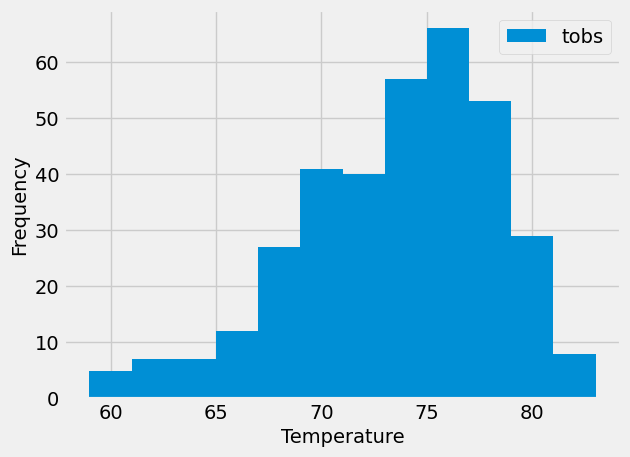

In [28]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active = session.query(measurement.tobs).\
    filter(measurement.station == "USC00519281").\
    filter(measurement.date >= one_year_ago).all()
most_active_df = pd.DataFrame(most_active, columns=["tobs"])

most_active_df.plot(kind='hist', bins=12)
plt.xlabel('Temperature')

# Close Session

In [29]:
# Close Session
session.close()